### Import modules

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import powerlaw

In [2]:
# mini_G = nx.read_gml('./Graphs/mini_graph.gml')
vocab_G = nx.read_gml('./Graphs/corpus_vocab.gml')
len(vocab_G)

11578

### Degree distribution

In [3]:
def degree_distro(G: nx.DiGraph, name) -> (float, float):
    """Get the degree exponent and plot the degree distribution of a network
    Parameters:
        G (nx.DiGraph): a directed network
        name (str): the name of the network
    Returns:
        float: the in-degree exponent
        float: the out-dgree exponent"""
    
    in_deg = np.array([i for i in dict(vocab_G.in_degree()).values() if i > 0])
    out_deg = np.array([i for i in dict(vocab_G.out_degree()).values() if i > 0])
    
    k_min, k_max = min(min(in_deg), min(out_deg)), max(max(in_deg), max(out_deg))
    
    # get log bins and density
    bin_edges = np.logspace(np.log10(k_min), np.log10(k_max), num = 25)
    in_density, _ = np.histogram(in_deg, bins = bin_edges, density = True)
    out_density, _ = np.histogram(out_deg, bins = bin_edges, density = True)
    
    # calculate degree exponent
    in_res = powerlaw.Fit(in_deg, discrete = True)
    print('In-degree gamma:', in_res.power_law.alpha)
    out_res = powerlaw.Fit(out_deg, discrete = True)
    print('Out-degree gamma:', out_res.power_law.alpha)
    
    log_be = np.log10(bin_edges)
    x = 10 ** ((log_be[: -1] + log_be[1 :]) / 2)
    
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.loglog(x, in_density, marker = 'o', ls = 'none', color = '#1c39bb', label = 'In-degree')
    plt.loglog(x, out_density, marker = '^', ls = 'none', color = '#ff8b00', label = 'Out-degree')
    plt.title('{} Network Degree Distribution'.format(name))
    plt.xlabel('Degree k')
    plt.ylabel('Density p(k)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.show()
    plt.close()
    
    return in_res.power_law.alpha, out_res.power_law.alpha

Calculating best minimal value for power law fit
In-degree gamma: 2.116580172099942
Calculating best minimal value for power law fit
Out-degree gamma: 2.196581597356233


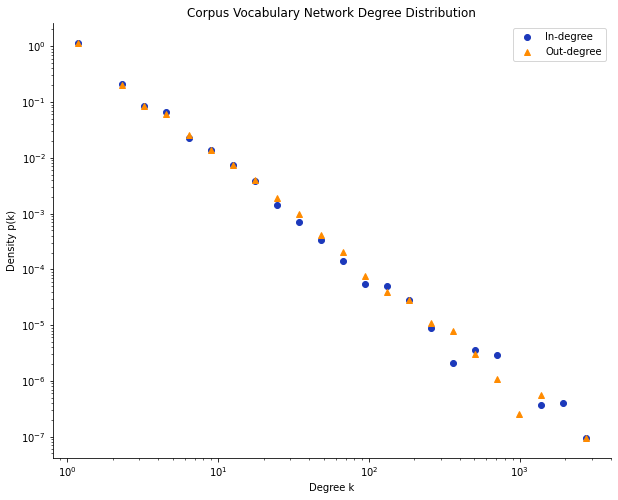

In [4]:
in_deg_exp, out_deg_exp = degree_distro(vocab_G, 'Corpus Vocabulary')

In [5]:
# def degree_distro(degrees: np.array, name) -> float:
#     """Get the degree exponent and plot the degree distribution of a network
#     Parameters:
#         degrees (np.array): the degrees of the network
#         name (str): degree type
#     Returns:
#         float: the degree exponent"""
    
#     k_min, k_max = min(degrees), max(degrees)
    
#     # get log bins and density
#     bin_edges = np.logspace(np.log10(k_min), np.log10(k_max), num = 25)
#     density, _ = np.histogram(degrees, bins = bin_edges, density = True)
    
#     # calculate degree exponent
#     res = powerlaw.Fit(degrees, discrete = True)
#     print('Gamma:', res.power_law.alpha)
    
#     log_be = np.log10(bin_edges)
#     x = 10 ** ((log_be[: -1] + log_be[1 :]) / 2)
    
#     fig, ax = plt.subplots(figsize = (10, 8))
#     plt.loglog(x, density, marker = 'o', ls = 'none', color = '#552583')
#     plt.title('{}-degree Distribution'.format(name))
#     plt.xlabel('Degree k')
#     plt.ylabel('Density p(k)')
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     plt.show()
#     plt.close()
    
#     return res.power_law.alpha

In [6]:
# in_deg_exp = degree_distro(np.array([i for i in dict(vocab_G.in_degree()).values() if i > 0]), 'In')

In [7]:
# out_deg_exp = degree_distro(np.array([i for i in dict(vocab_G.out_degree()).values() if i > 0]), 'Out')